# Set up

In [0]:
# Load basic library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random

# Load Keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

#Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# import require packages for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import altair as alt # no need to add altviewer
from pandas.plotting import scatter_matrix


In [0]:
file='https://media.githubusercontent.com/media/aapatel09/handson-unsupervised-learning/master/datasets/credit_card_data/credit_card.csv'
data=pd.read_csv(file)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

In [0]:
data.shape

(284807, 31)

In [0]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [0]:
#data.plot(kind='density',subplots=True,layout=(6,6),sharex=False,
             #fontsize=1,legend=True,figsize=(10,10))
#plt.tight_layout()

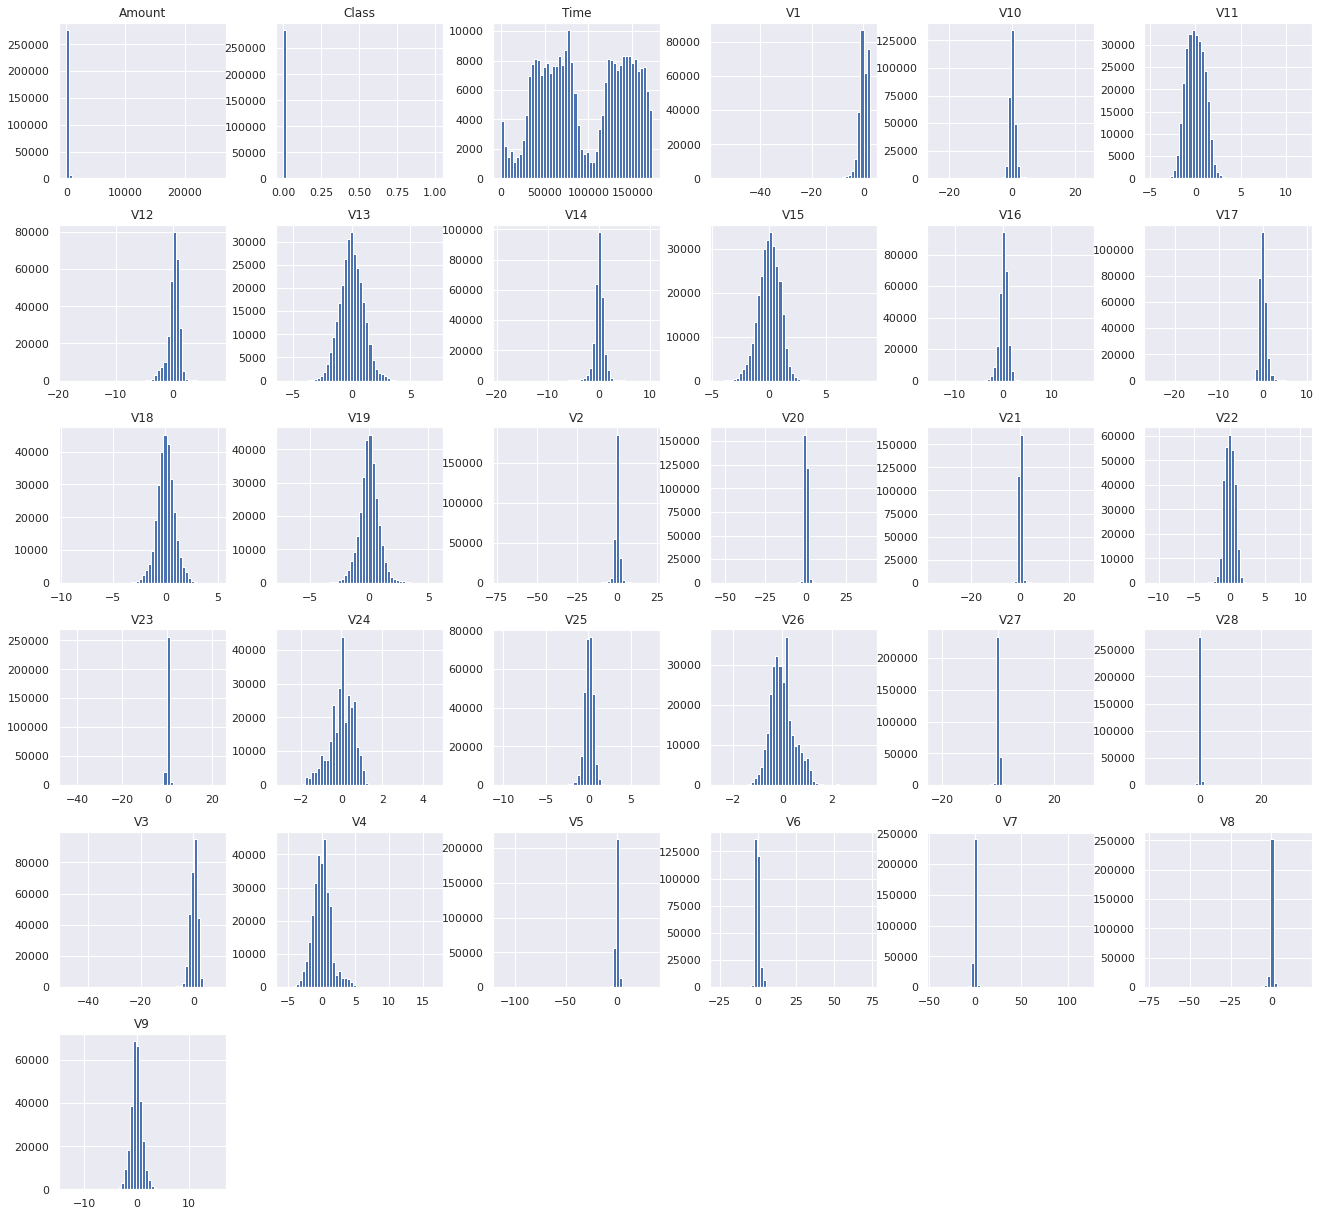

In [0]:
data.hist(bins=50, figsize=(20,20))
plt.show()

<function matplotlib.pyplot.tight_layout>

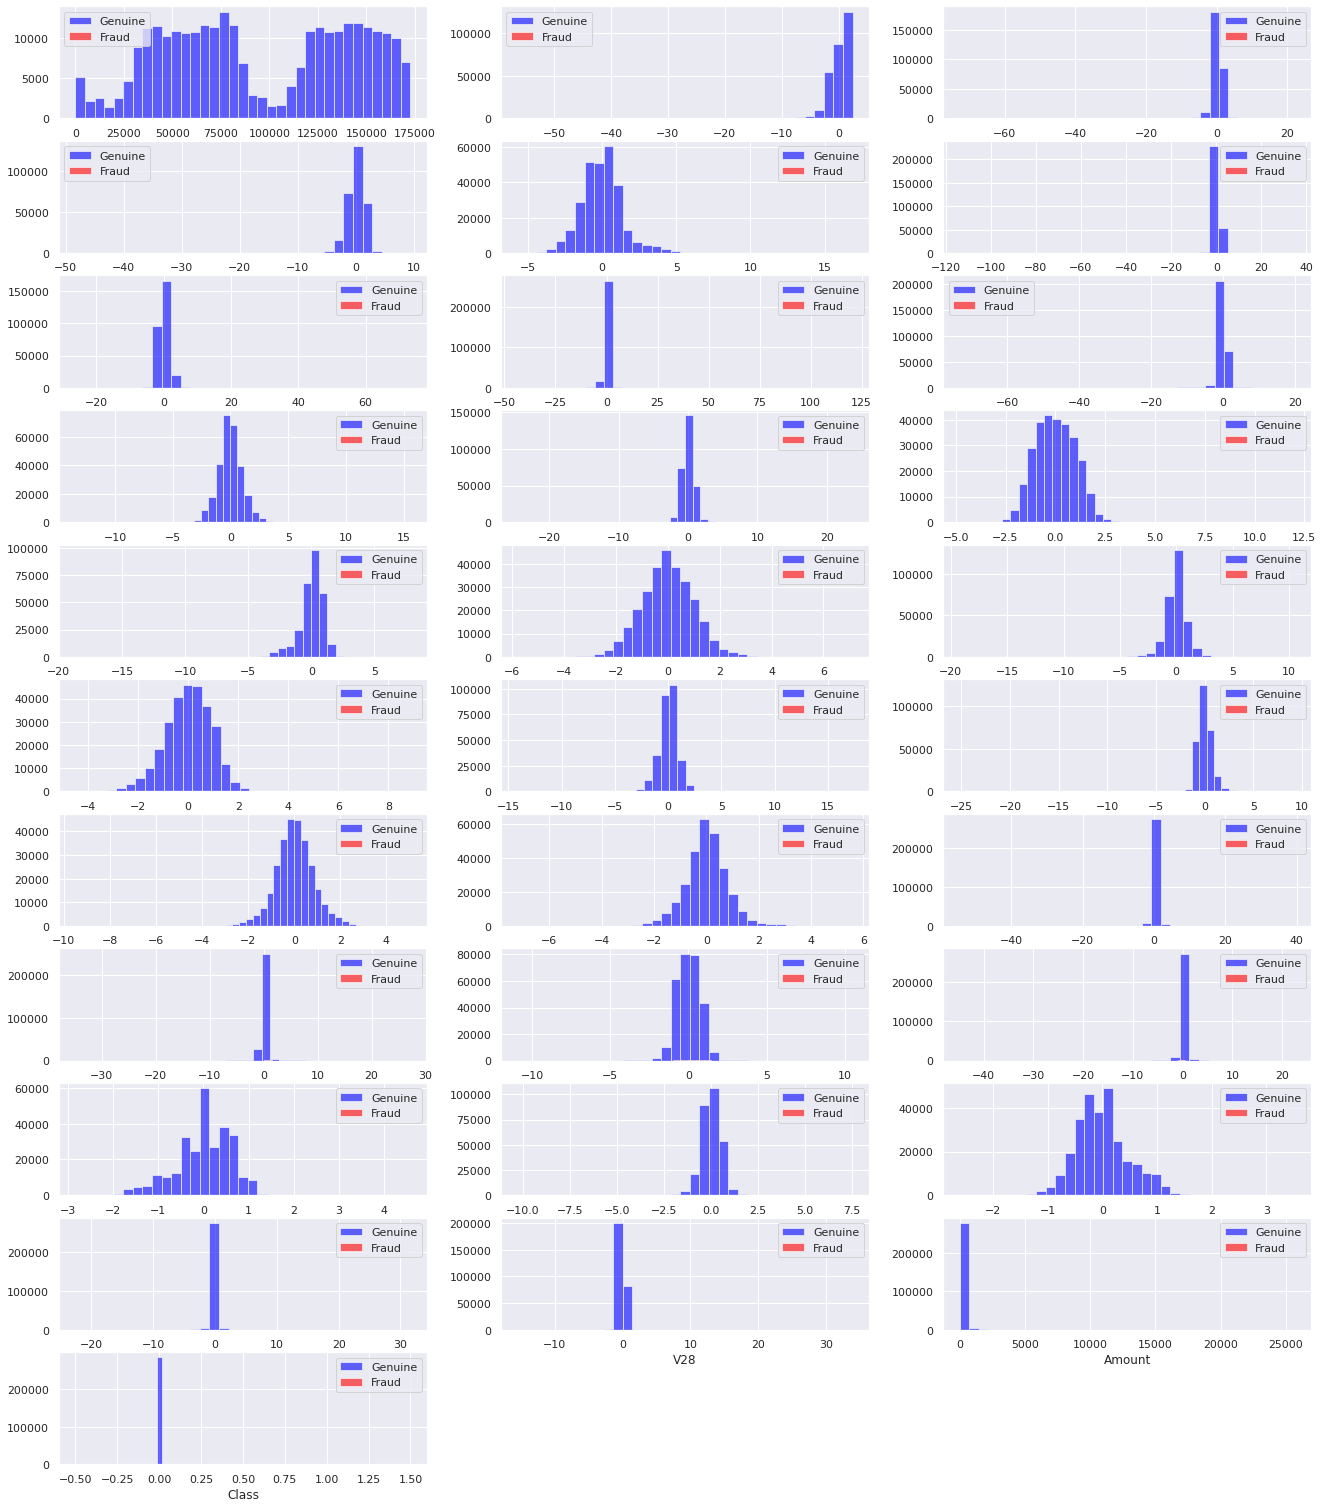

In [0]:
plt.figure(figsize=(20, 25))

for i, column in enumerate(data.columns, 1):
  plt.subplot(11, 3, i)
  data[data["Class"] == 0][column].hist(bins=35, color='blue', label='Genuine', alpha=0.6)
  data[data["Class"] == 1][column].hist(bins=35, color='red', label='Fraud', alpha=0.6)
  plt.legend()
  plt.xlabel(column)
plt.tight_layout


In [0]:
range(3)

range(0, 3)

In [0]:
#fig, axs = plt.subplots(nrows=11,ncols=3)
#for i, column in enumerate(data.columns,0):
#  for j in range(3):
    #print(i,j)
#    g=sns.FacetGrid(data, hue="Class",height=6) \
#      .map(sns.kdeplot,column,ax=axs[i,j]) \
#     .add_legend()
#    axes = g.axes.flatten()
#    axes[0].set_title(column)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

<function matplotlib.pyplot.tight_layout>

<Figure size 1440x1800 with 0 Axes>

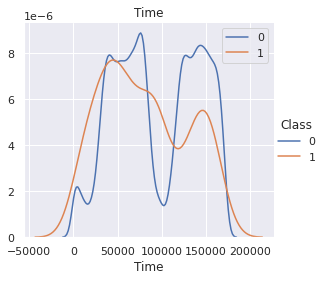

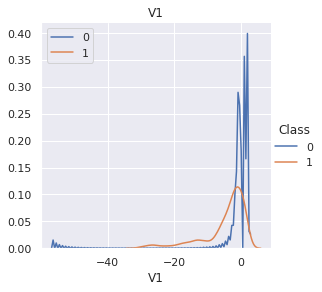

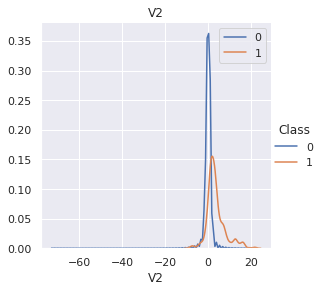

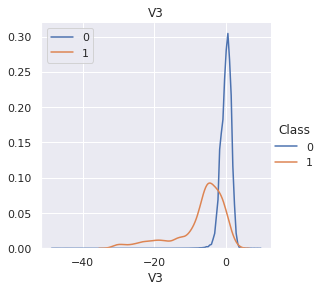

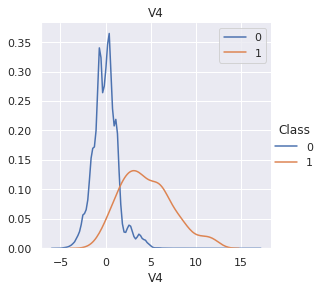

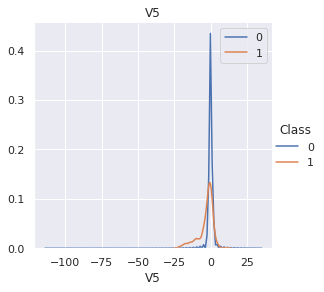

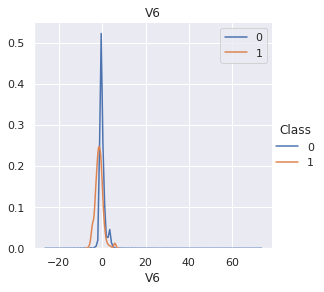

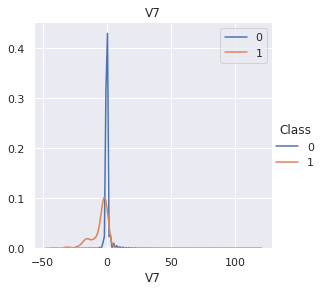

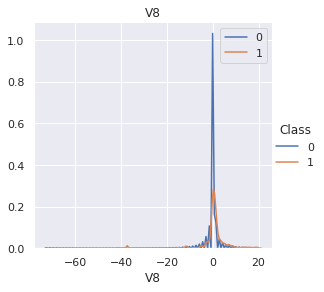

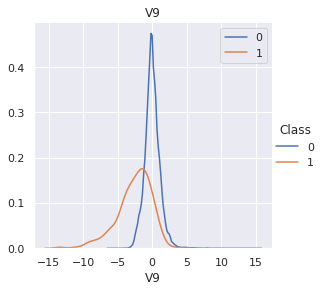

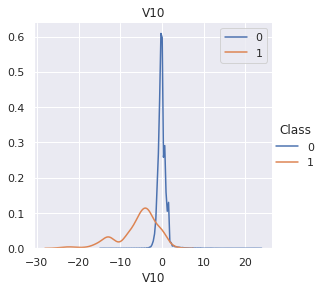

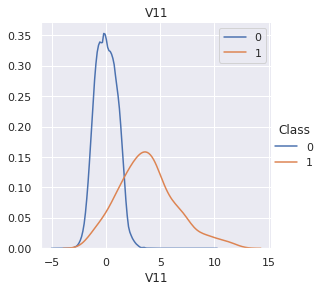

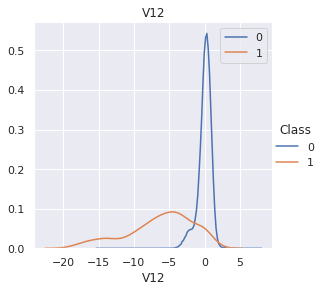

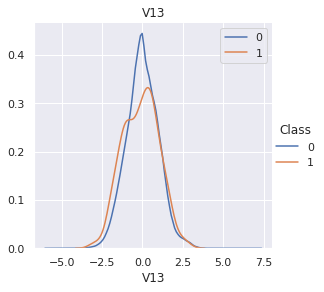

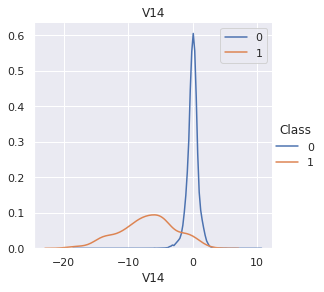

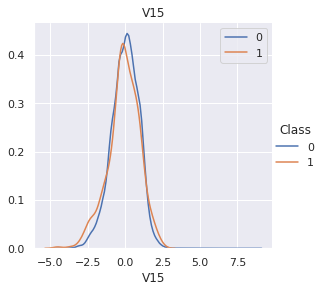

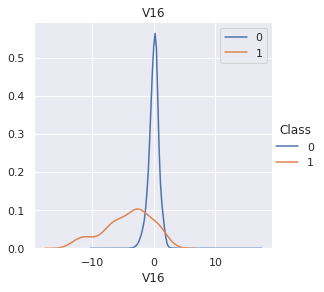

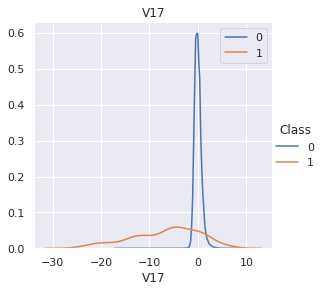

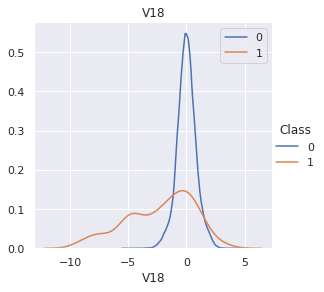

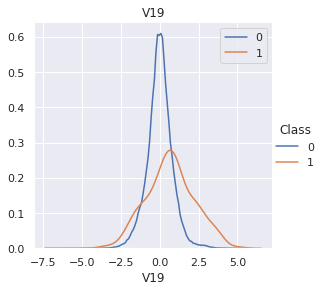

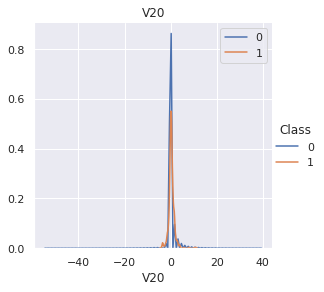

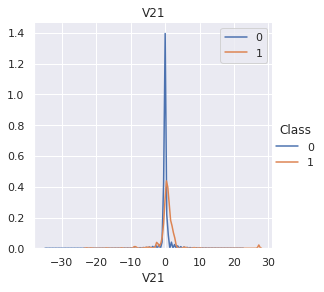

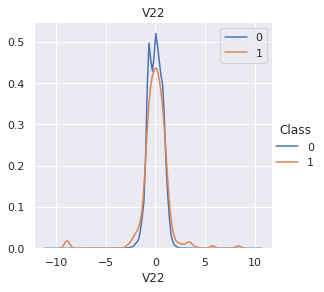

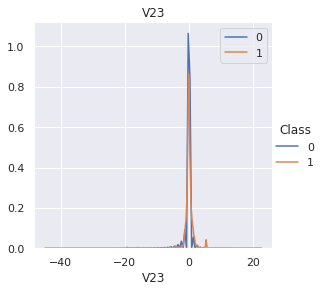

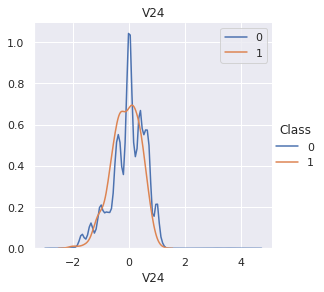

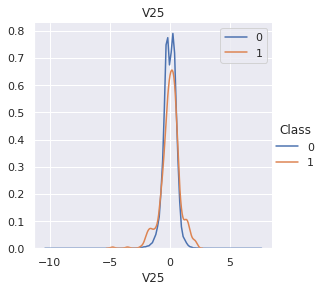

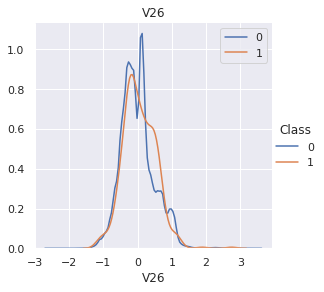

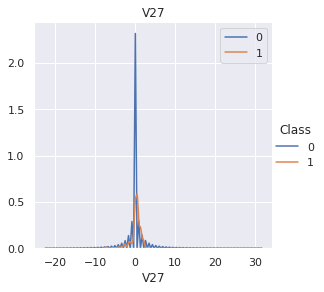

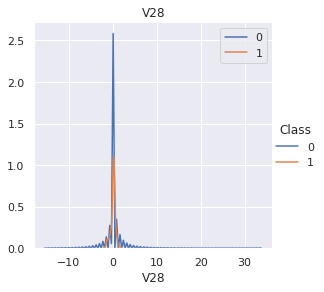

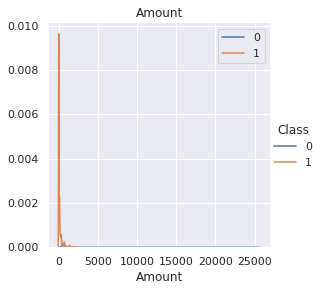

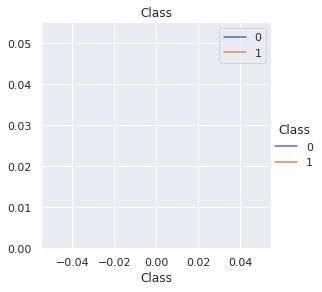

In [0]:
plt.figure(figsize=(20, 25))

for i, column in enumerate(data.columns, 1):
  #plt.subplot(11, 3, i)
  g=sns.FacetGrid(data, hue="Class",height=4) \
   .map(sns.kdeplot, column) \
   .add_legend()
  axes = g.axes.flatten()
  axes[0].set_title(column)
  plt.ioff() 
  plt.legend()
  #plt.xlabel(column)
plt.tight_layout


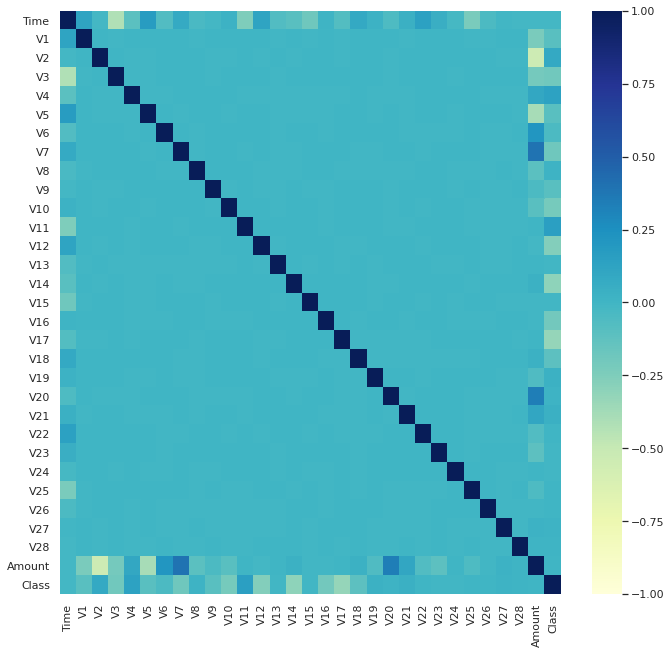

In [0]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot = False,cmap="YlGnBu",ax=ax)
plt.show()

In [0]:
data.corr(method ='pearson').sort_values(by='Class',ascending=False) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Class,-0.012323,-1.013473e-01,9.128865e-02,-1.929608e-01,1.334475e-01,-9.497430e-02,-4.364316e-02,-1.872566e-01,1.987512e-02,-9.773269e-02,-2.168829e-01,1.548756e-01,-2.605929e-01,-4.569779e-03,-3.025437e-01,-4.223402e-03,-1.965389e-01,-3.264811e-01,-1.114853e-01,3.478301e-02,2.009032e-02,4.041338e-02,8.053175e-04,-2.685156e-03,-7.220907e-03,3.307706e-03,4.455398e-03,1.757973e-02,9.536041e-03,0.005632,1.000000
V11,-0.247689,2.438580e-16,9.468995e-16,-5.501758e-17,-2.083600e-16,7.342759e-16,4.865799e-16,-1.084105e-15,1.954747e-16,4.682341e-16,2.624448e-16,1.000000e+00,3.176029e-15,1.945810e-15,3.637160e-17,4.801345e-16,-6.173867e-16,8.719713e-16,5.978229e-16,3.216338e-16,-2.310189e-16,-3.911893e-16,-3.811640e-17,2.232007e-16,1.219849e-15,-4.567635e-16,-1.110976e-16,-2.635827e-16,-3.091914e-16,0.000104,0.154876
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V21,0.044736,-1.755072e-16,8.444409e-17,-2.971969e-17,-9.976950e-17,-1.368701e-16,-1.575903e-16,1.938604e-16,-2.412439e-16,4.578389e-17,8.089504e-16,-3.911893e-16,3.229576e-16,9.499130e-17,1.634141e-17,1.947458e-17,-3.927401e-16,-7.753967e-16,-1.140973e-15,4.032541e-16,-1.120828e-15,1.000000e+00,3.905948e-15,6.127323e-16,1.298254e-16,-2.826293e-16,-4.907301e-16,-1.033403e-15,5.132234e-16,0.105999,0.040413
V19,0.028975,1.818128e-16,9.528280e-17,2.576773e-16,-2.656938e-16,-3.138234e-16,2.717167e-16,-2.874017e-16,-5.339821e-16,1.120752e-16,2.663038e-17,3.216338e-16,9.282566e-17,-2.594988e-16,-1.061486e-16,-8.556257e-16,1.041659e-15,-3.916791e-16,-2.424185e-15,1.000000e+00,2.938450e-16,4.032541e-16,-9.690436e-16,5.733798e-16,3.126716e-17,7.415355e-16,5.614354e-16,-1.113035e-16,-1.375843e-15,-0.056151,0.034783
V20,-0.050866,1.036959e-16,-9.309954e-16,-9.429297e-16,-3.223123e-16,2.076048e-16,1.898638e-16,1.744242e-16,-1.095534e-16,-4.340941e-16,-1.141888e-15,-2.310189e-16,1.276976e-16,2.345665e-18,-1.789433e-16,3.240475e-16,3.903456e-16,-9.887431e-16,-4.942764e-16,2.938450e-16,1.000000e+00,-1.120828e-15,1.105842e-15,4.986739e-16,1.637488e-16,-1.518242e-16,-2.975081e-16,-1.446069e-15,-1.133579e-16,0.339403,0.020090
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V27,-0.005135,3.208233e-17,-4.478472e-16,6.239832e-16,-6.403423e-17,4.465960e-16,-2.623818e-16,-5.886825e-16,1.733633e-16,-2.287414e-16,-3.103239e-16,-2.635827e-16,-2.312619e-16,-4.520414e-16,1.285770e-16,-1.265235e-15,7.820038e-16,8.844373e-16,2.435170e-16,-1.113035e-16,-1.446069e-15,-1.033403e-15,-1.294910e-16,5.524044e-16,-3.736529e-16,-6.107118e-16,-3.383861e-16,1.000000e+00,-3.770124e-16,0.028825,0.017580
V28,-0.009413,9.820892e-16,-3.676415e-16,7.726948e-16,-5.863664e-17,-3.299167e-16,4.813155e-16,-6.836764e-17,-4.484325e-16,9.146779e-16,-1.515934e-16,-3.091914e-16,7.327446e-16,1.049

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



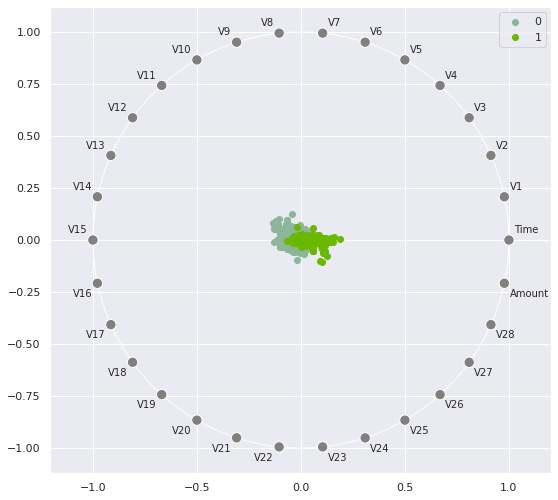

In [0]:
#RadViz
fig,ax=plt.subplots(figsize=(8, 8))
pd.plotting.radviz(data, 'Class',ax=ax) 
plt.show() 

In [0]:
fig = px.parallel_coordinates(data[['V11','V4','V2','V21','Class']], 
                              color="Class",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             #color_continuous_midpoint=2
                              )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

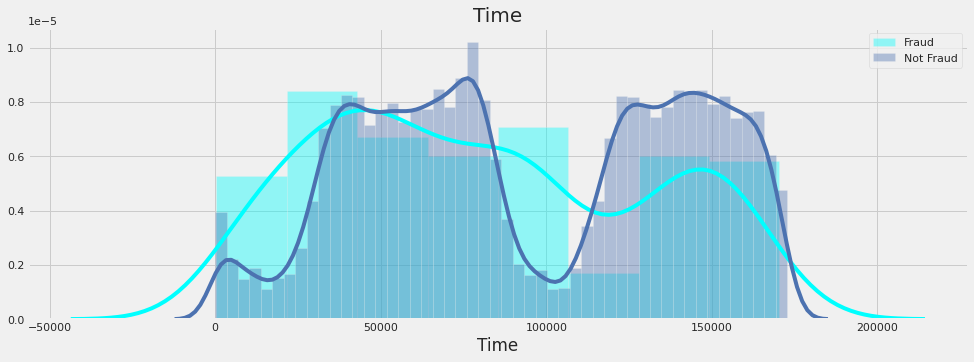

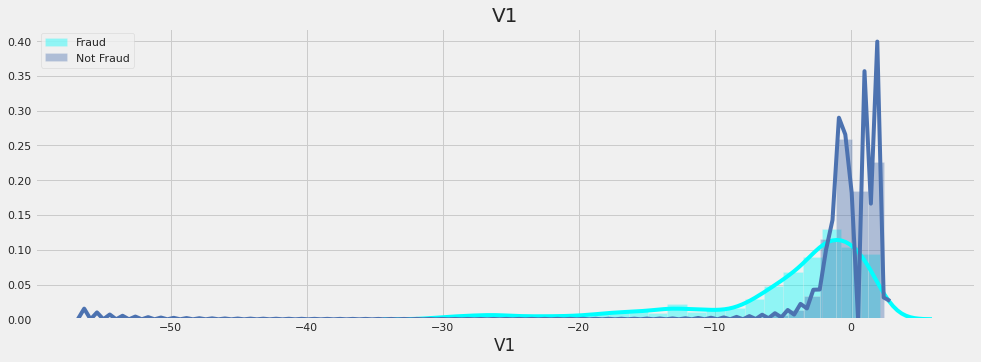

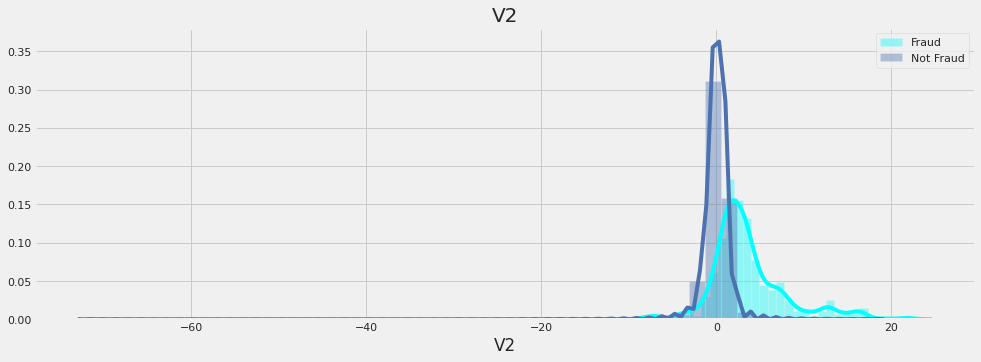

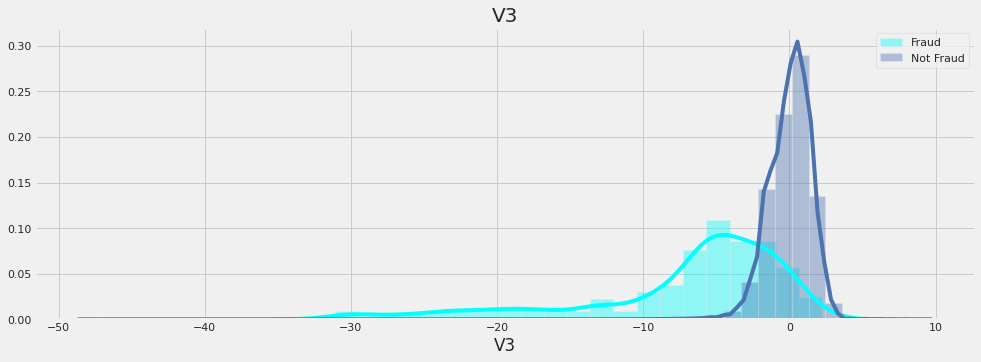

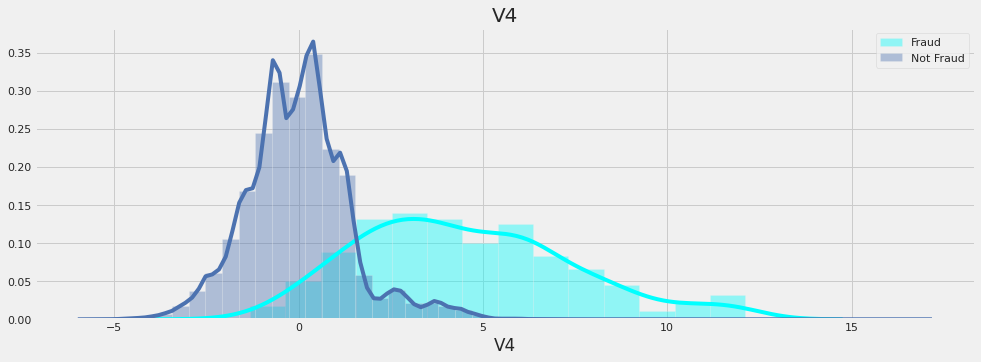

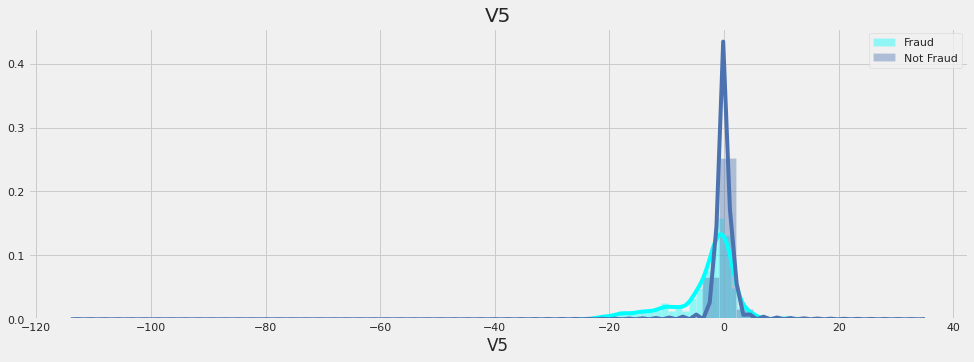

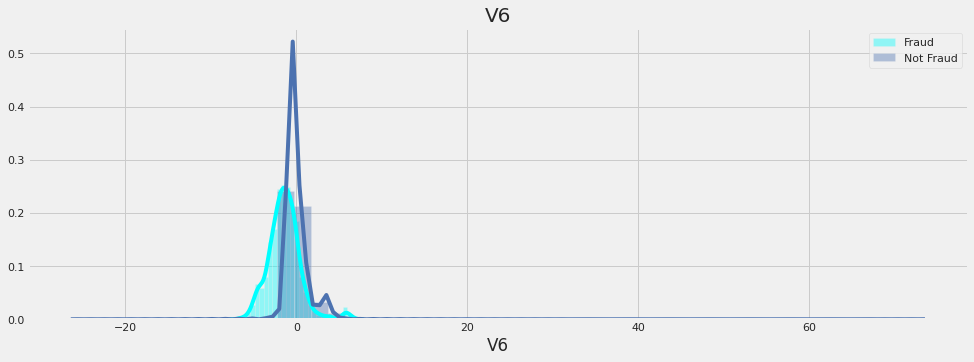

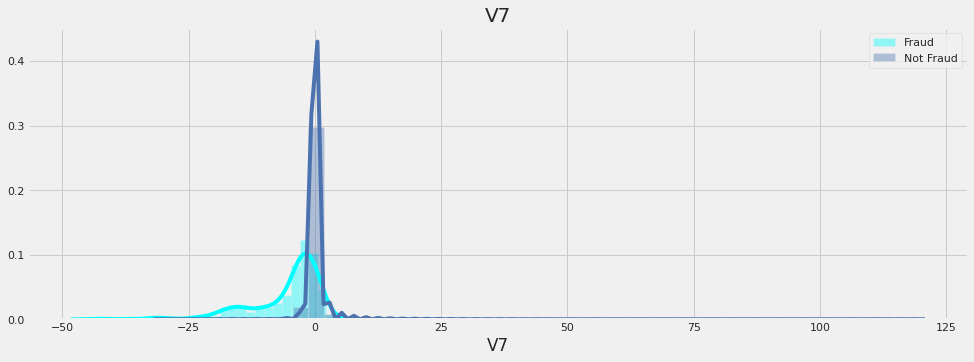

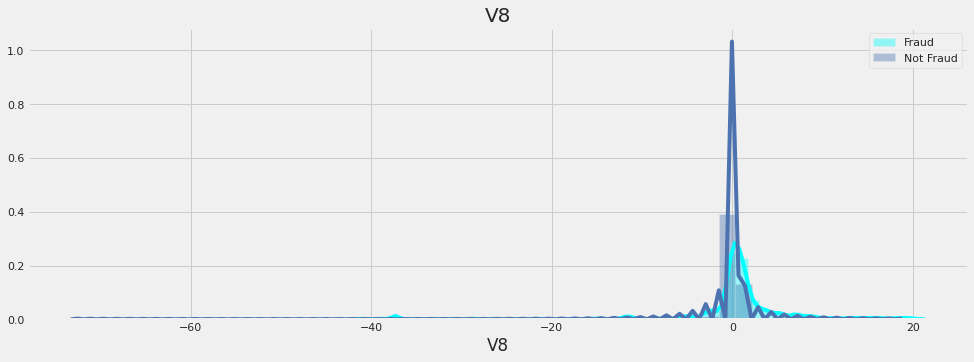

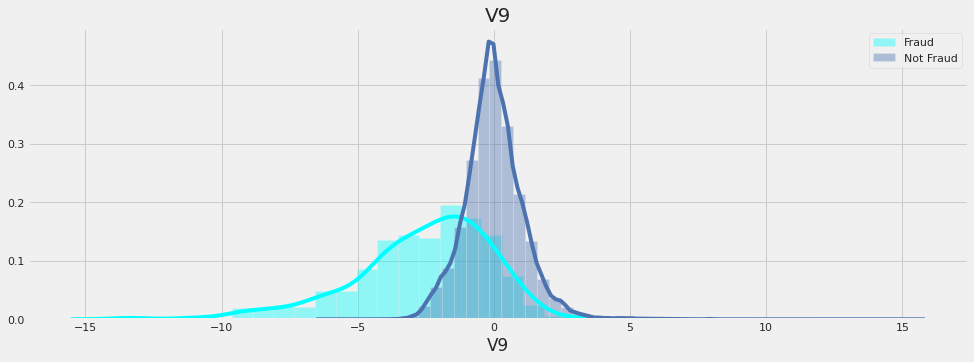

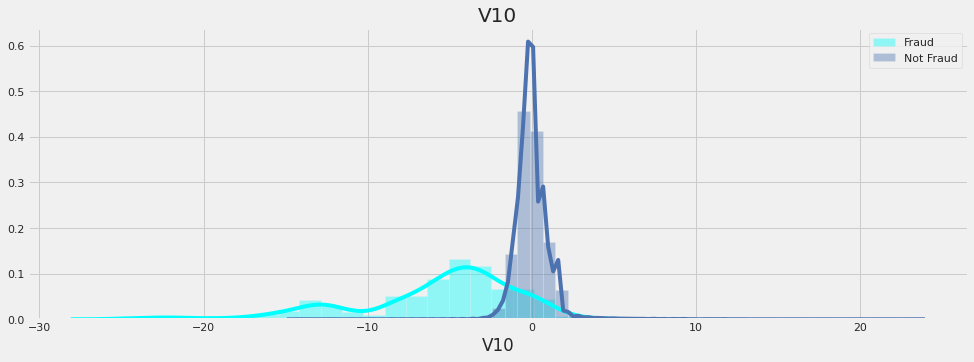

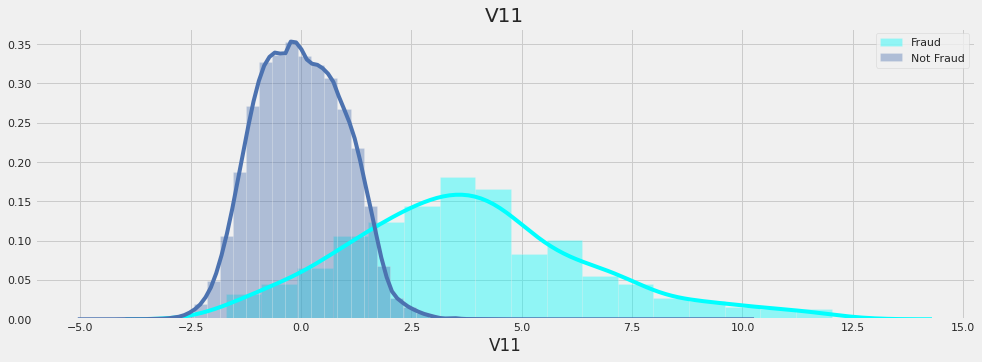

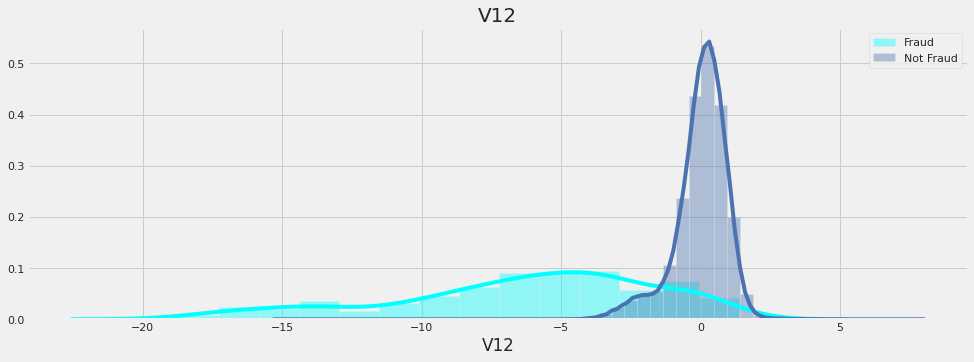

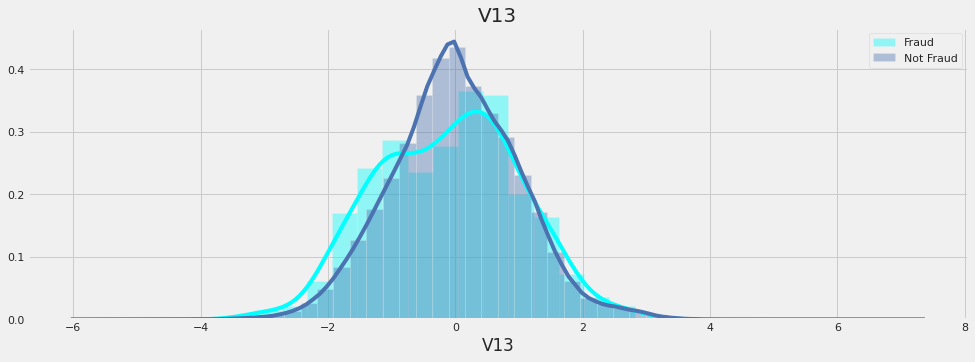

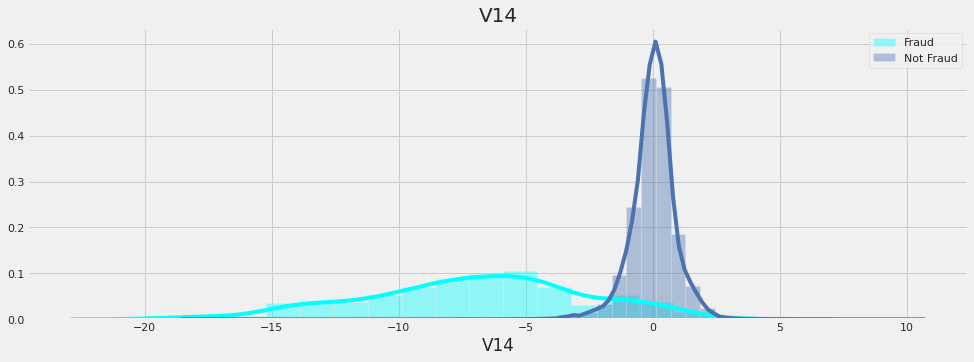

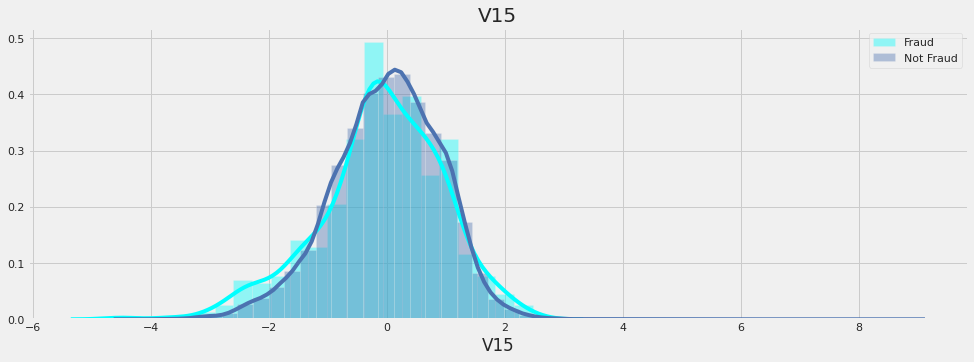

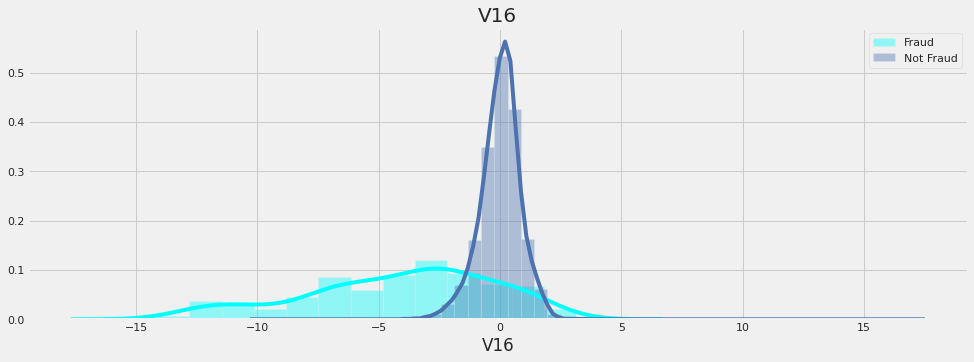

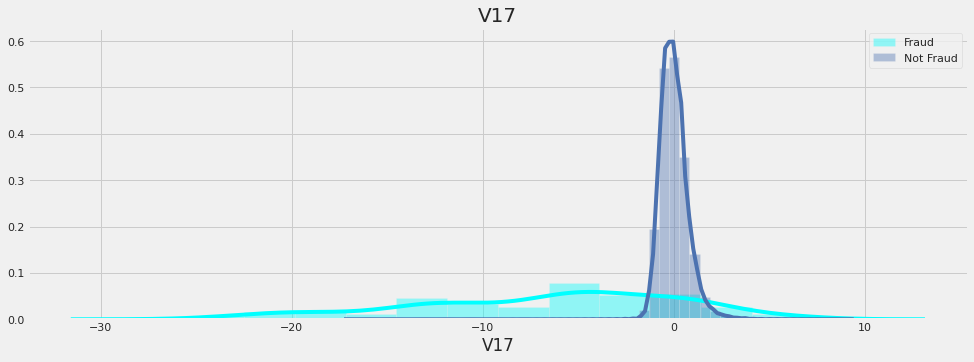

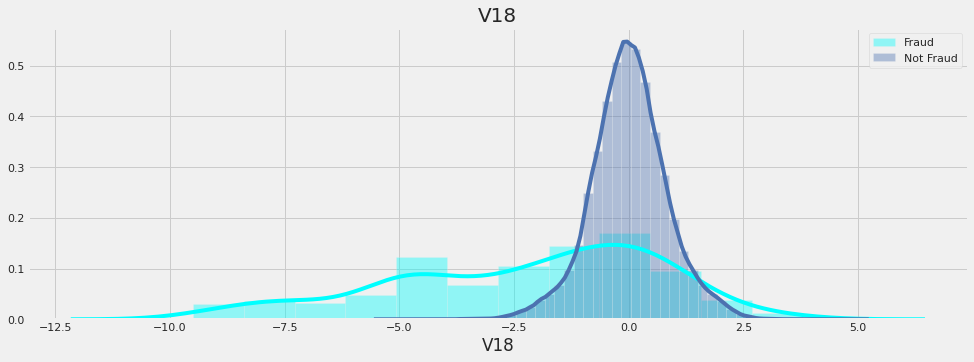

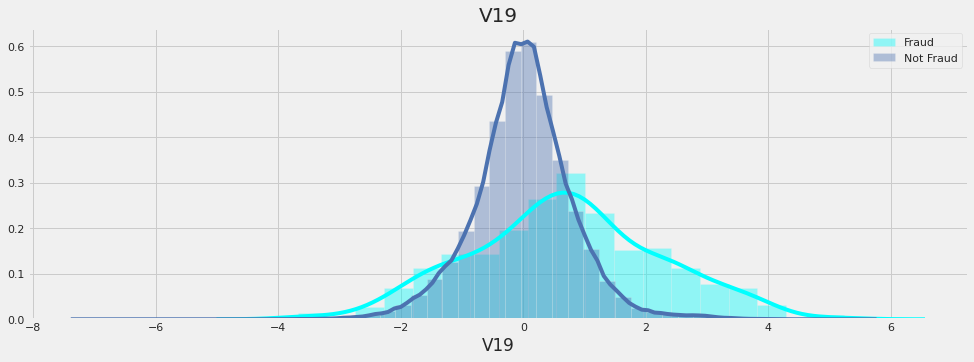

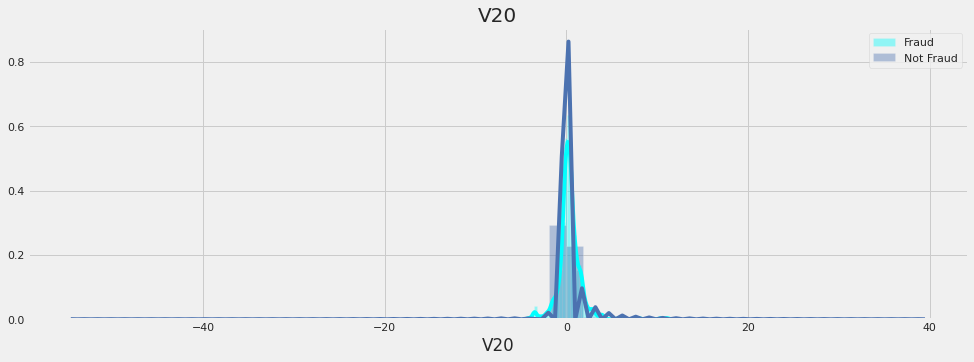

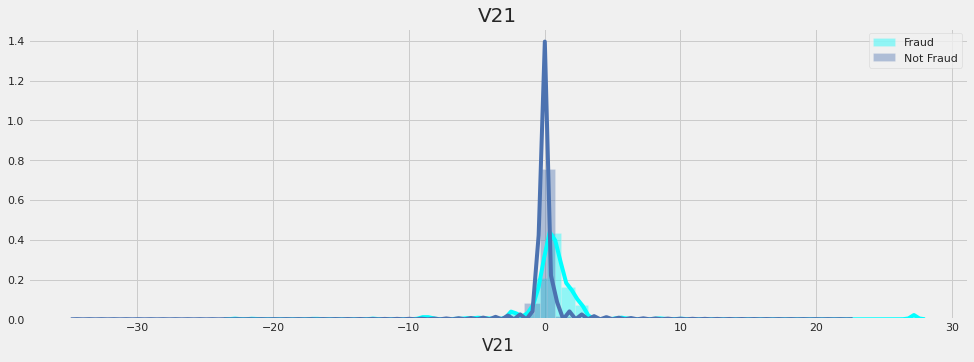

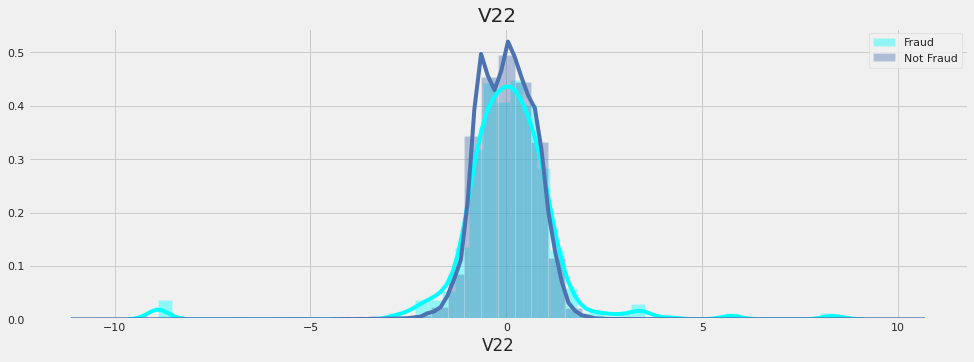

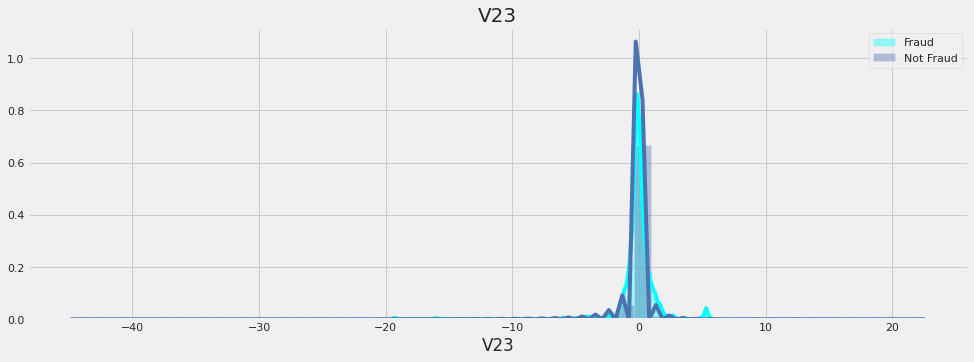

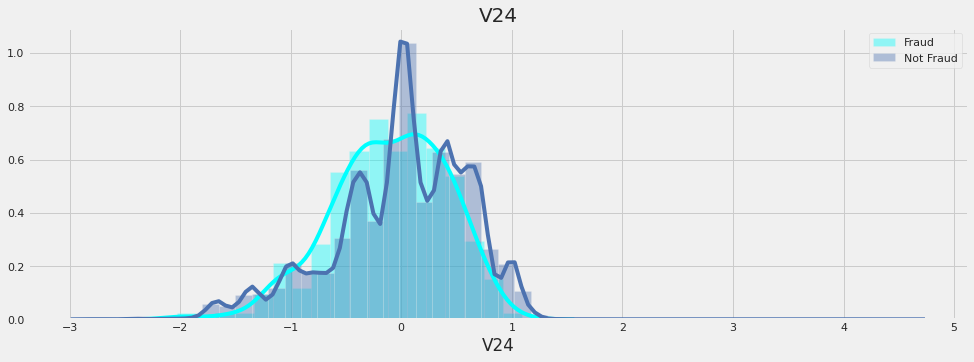

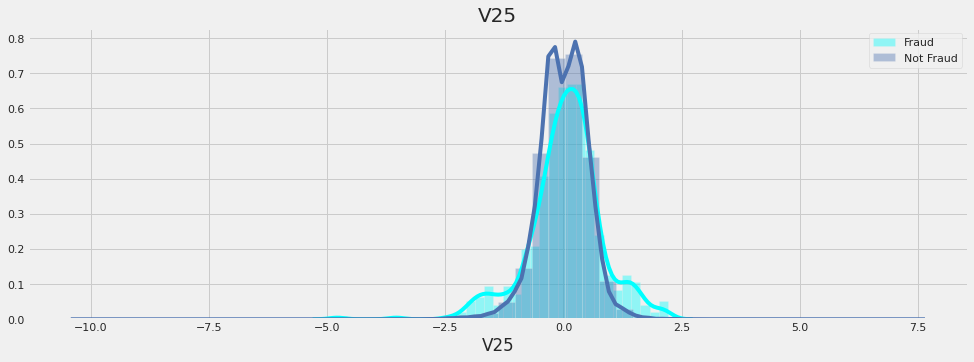

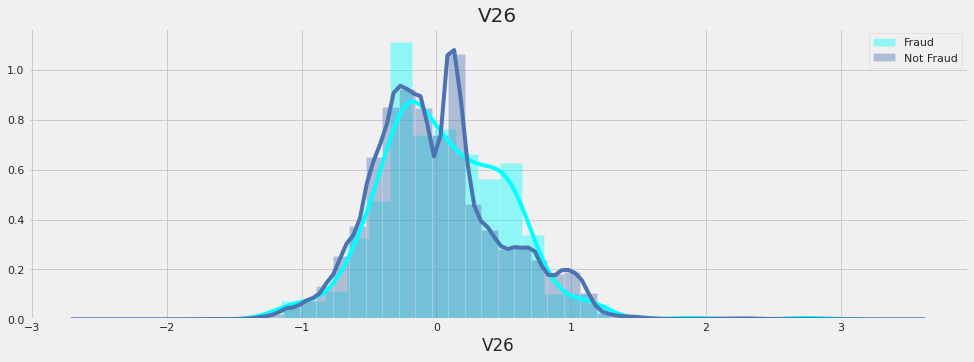

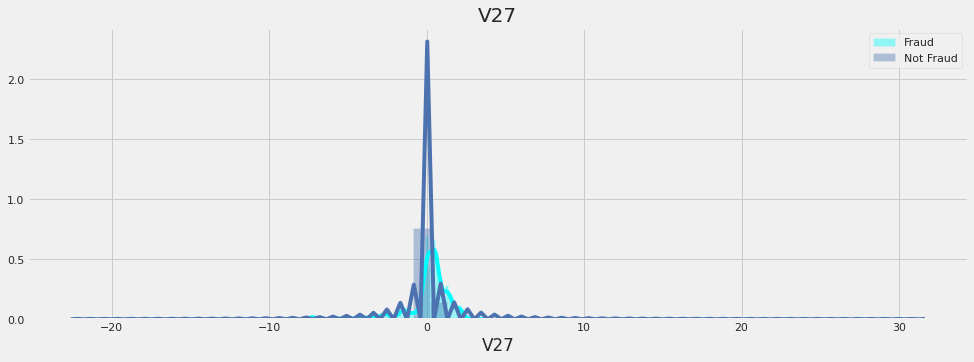

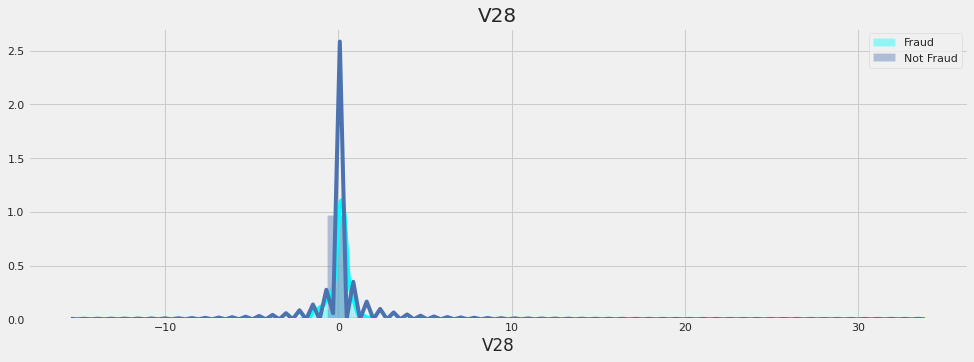

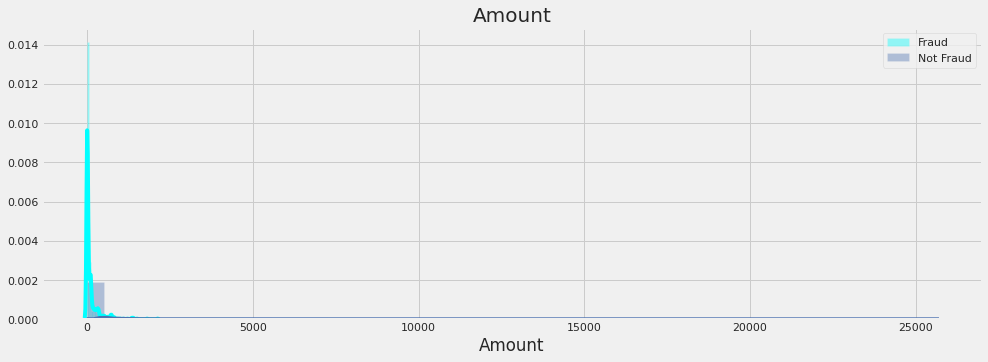

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



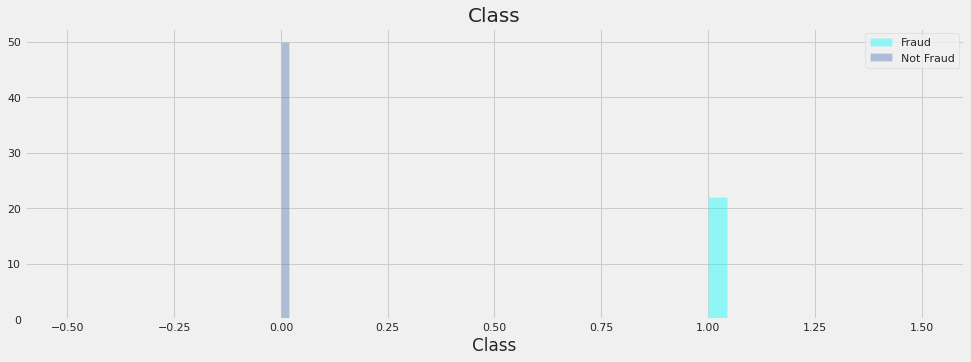

In [0]:
for column in data.columns:
  plt.style.use('fivethirtyeight')
  plt.rcParams['figure.figsize'] = (15, 5)
  sns.distplot(data[column][data['Class']==1], color = 'cyan',label='Fraud')
  sns.distplot(data[column][data['Class']==0], color = 'b',label='Not Fraud')
  plt.title(column, fontsize = 20)
  plt.legend()
  plt.show()

In [0]:

for i,col in enumerate(data.columns.values[:4],1):
  print(i,col)

1 Time
2 V1
3 V2
4 V3


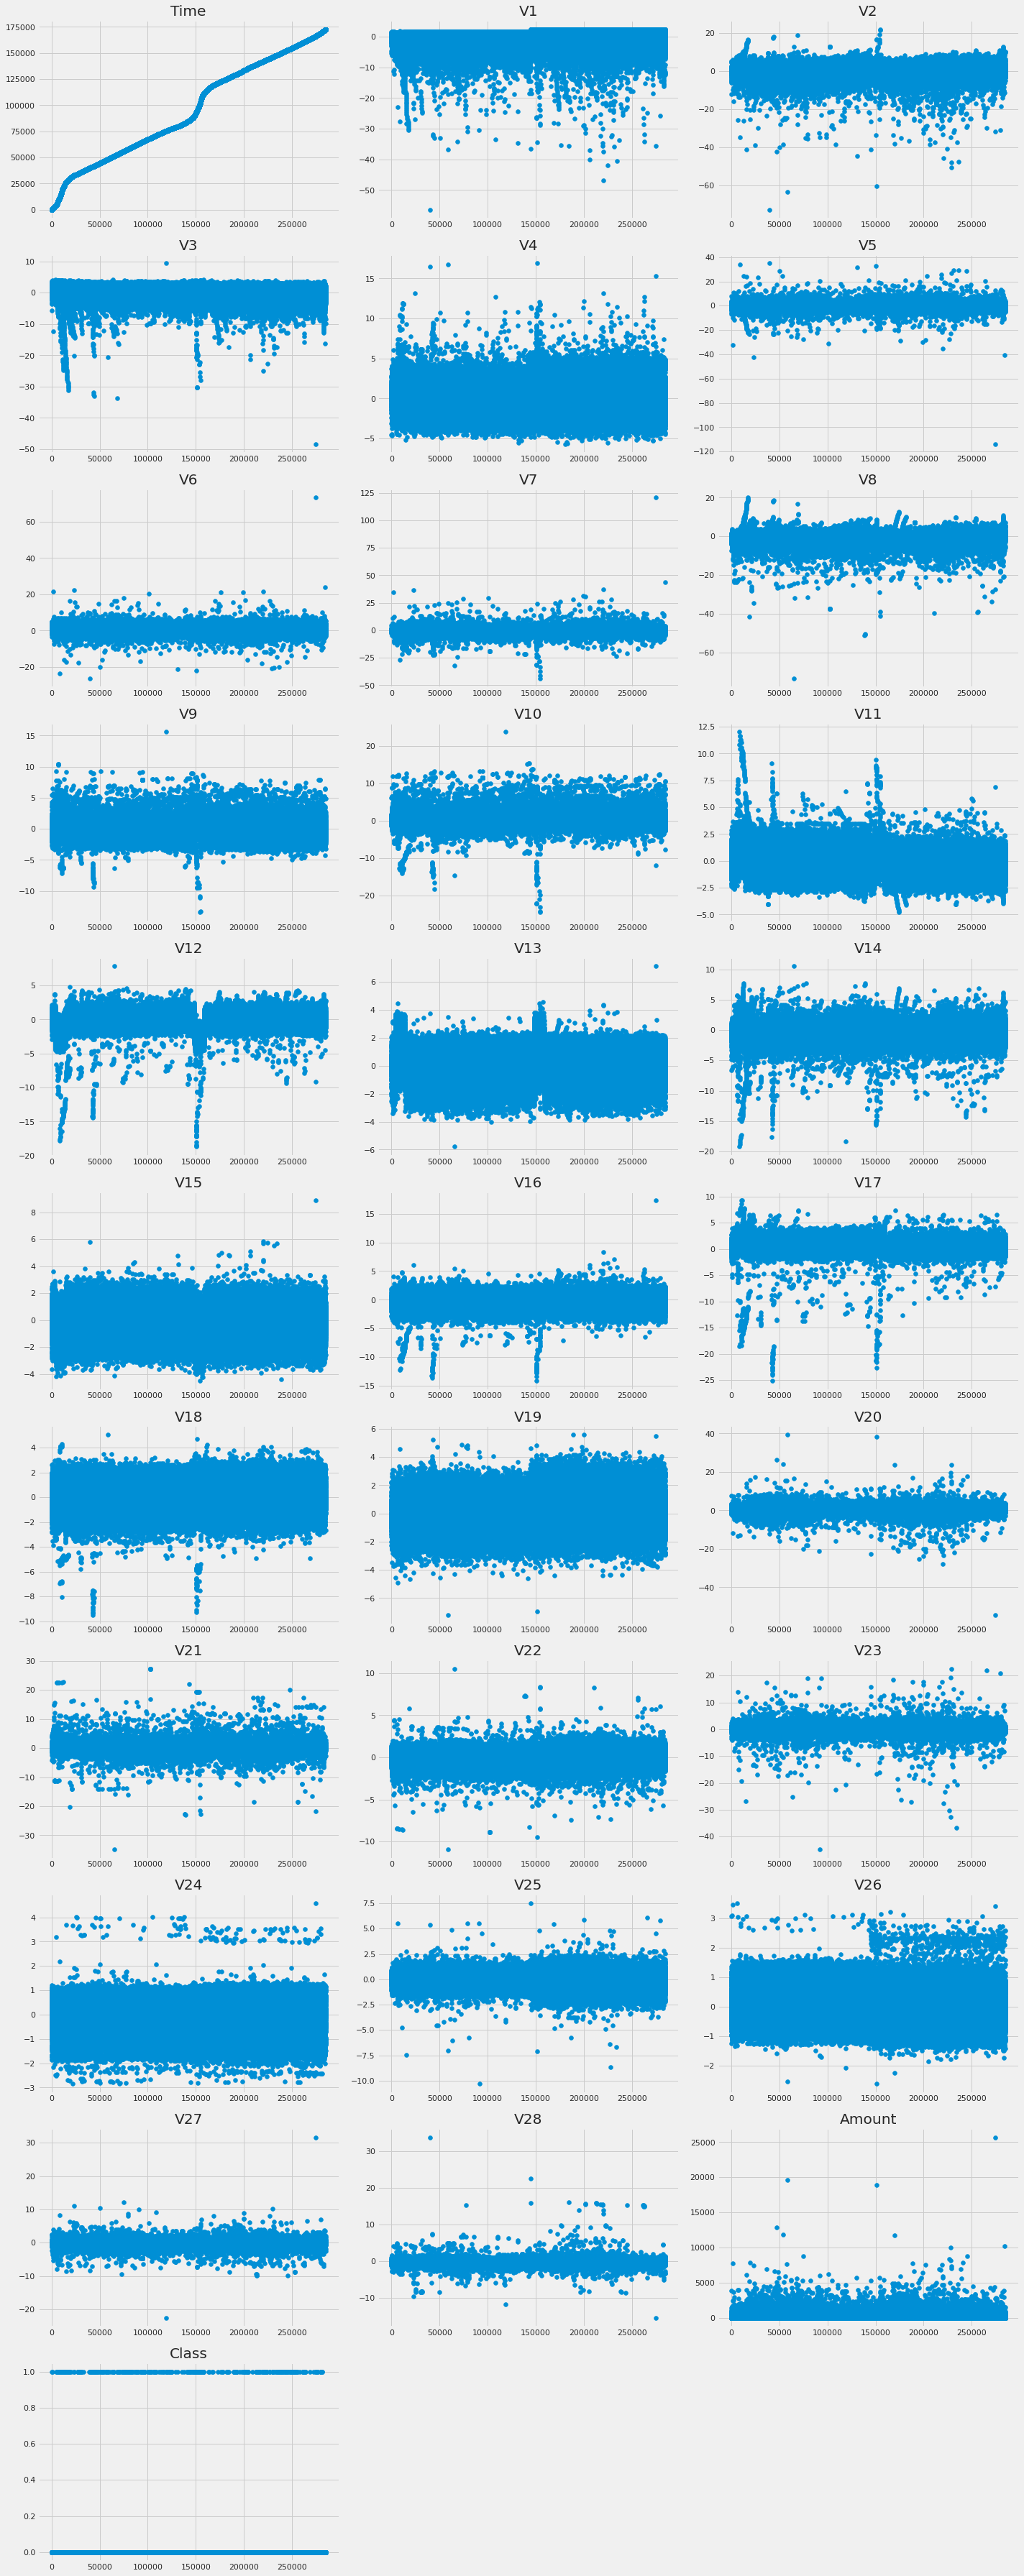

In [0]:
plt.figure(figsize=(20, 50))
for i,col in enumerate(data.columns.values):
    plt.subplot(11,3,i+1)
    plt.scatter([i for i in range(data.shape[0])],data[col].values.tolist())
    plt.title(col)
    #fig,ax=plt.gcf(),plt.gca()
    #fig.set_size_inches(200,200)
plt.tight_layout()
plt.show()


In [0]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


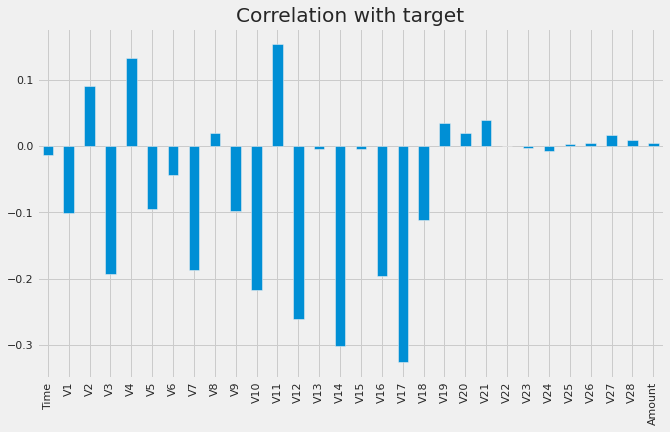

In [0]:
data.drop('Class', axis=1).corrwith(data.Class).plot(kind='bar', grid=True, figsize=(10, 6), 
                                                   title="Correlation with target")

In [0]:
fig = px.scatter(data, x="V11", y="V4",
                #size="Time", 
                color="Class",
                #hover_name="Time", 
                log_x=True, size_max=60)
#fig.update_layout(height=400, width=1700)
fig.show()

Output hidden; open in https://colab.research.google.com to view.